## Feature Selection Methods
Notebook destinado para agrupar os métodos de feature selection

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

#### Variáveis

In [2]:
from sklearn.datasets import make_regression

In [3]:
X, y = make_regression(n_samples = 1000, n_features = 100, n_informative = 10, n_targets = 1, random_state = 0)

### Filter Methods

#### Information Gain

Calcula a informação mútua entre duas variáveis, que mede a dependência entre as variáveis. Quanto maior o valor maior a dependência

In [4]:
from sklearn.feature_selection import mutual_info_regression

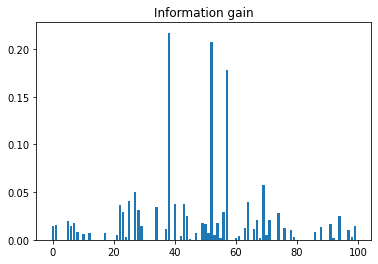

In [5]:
#Calcula a importância mútua de cada feature
importance = mutual_info_regression(X,y)

plt.figure()
plt.title("Information gain")
plt.bar(height = importance, x = np.arange(len(importance)))
plt.show()

#### F Regression
Testa o efeito de cada feature individualmente usando a correlação e a pontuação F

In [6]:
from sklearn.feature_selection import f_regression

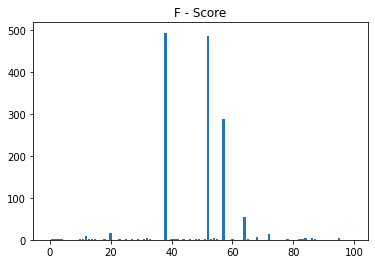

In [7]:
importance = f_regression(X, y)

plt.figure()
plt.title("F - Score")
plt.bar(height = importance[0], x = np.arange(len(importance[0])))
plt.show()

#### Correlation Coeficient
Mede a correlação linear entre duas variáveis. Utiliza a Correlação de Pearson. Quanto maior a correlação entre uma feature e a variável target maior sua importância.
Se duas features são altamente correlacionadas não é necessário utilizar as duas para encontrar a target.

<AxesSubplot:>

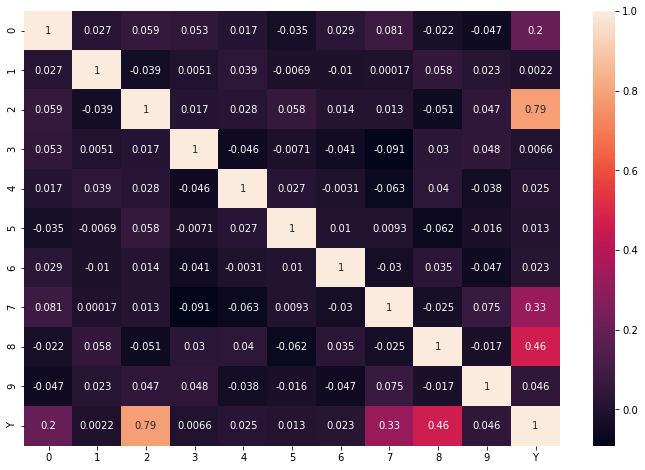

In [8]:
X_c, y_c = make_regression(n_samples = 500, n_features = 10, n_informative = 4, n_targets = 1, random_state = 0)

df = pd.DataFrame(X_c)
df['Y'] = y_c

cor = df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(cor, annot = True)

#### Variance Threshold
Remove as features que possuem variância abaixo de um Threshold.
É esperado que as features com mais variância possuam mais informações relevantes

In [9]:
from sklearn.feature_selection import VarianceThreshold

In [10]:
X_v = [[0, 0, 0, 1],[1, 0, 0, 1],[0, 0, 1, 1],[1, 0, 1, 0],[0, 1, 0, 0],
     [0, 0, 0, 0],[1, 0, 1, 0],[1, 0, 0, 1],[0, 0, 1, 0],[0, 0, 0, 1]]

v_th = VarianceThreshold(threshold = 0.2)
v_th.fit(X_v)
v_th.get_support()

array([ True, False,  True,  True])

### Wrapper Methods
Métodos que utilizam subconjuntos de features para treinar um modelo e encontram o subconjunto com melhores resultados

#### Forward Sequential Feature Selection
Inicia a busca pela melhor feature (treina um modelo e usa sua pontuação para selecionar o melhor), após encontrar a melhor, busca pela segunda melhor e assim vai até encontrar as N melhores

In [15]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.svm import SVR

In [28]:
svm = SVR()

In [30]:
fsfs = SequentialFeatureSelector(svm, n_features_to_select = 2)
fsfs.fit(X, y)

SequentialFeatureSelector(estimator=SVR(), n_features_to_select=2)

In [31]:
fsfs.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [33]:
X_fsfs = fsfs.transform(X)

#### Backward Sequential Feature Selection
Começa com todas as features e vai eliminando as ineficazes

In [36]:
bsfs = SequentialFeatureSelector(svm, n_features_to_select = 2)
bsfs.fit(X, y)

SequentialFeatureSelector(estimator=SVR(), n_features_to_select=2)

In [37]:
bsfs.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [38]:
X_bsfs = bsfs.transform(X)

In [40]:
# Demonstrando o X depois das transformações
print("Forward")
print(X_fsfs)
print("Backward")
print(X_bsfs)

Forward
[[ 0.49061938 -0.98028353]
 [ 0.06852916 -1.55810274]
 [ 0.40955178 -0.7995935 ]
 ...
 [-0.76812864 -2.0508409 ]
 [-1.42021759  1.16593998]
 [ 2.31269507  1.13693406]]
Backward
[[ 0.49061938 -0.98028353]
 [ 0.06852916 -1.55810274]
 [ 0.40955178 -0.7995935 ]
 ...
 [-0.76812864 -2.0508409 ]
 [-1.42021759  1.16593998]
 [ 2.31269507  1.13693406]]


Mesmas features selecionadas

### SelectFromModel
Usando modelos de ML para encontrar as melhores features

#### L1 based
Utilizando a regressão Lasso para encontrar as features

In [44]:
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel

In [42]:
lasso = LassoCV(cv= 5)
lasso.fit(X,y)

LassoCV(cv=5)

In [43]:
importance = lasso.coef_

In [45]:
# Definindo limiar como pontuação do 5 colocado

threshold = np.sort(importance)[-5]+0.01

sfm = SelectFromModel(lasso, threshold = threshold)
sfm.fit(X,y)

X_sfm_lin = sfm.transform(X)

print(X_sfm_lin)

[[ 4.90619377e-01 -9.80283529e-01 -7.27186231e-01 -3.71175521e-01]
 [ 6.85291585e-02 -1.55810274e+00 -1.56639914e+00 -2.20780263e+00]
 [ 4.09551778e-01 -7.99593500e-01 -4.17326413e-04  3.74155086e-01]
 ...
 [-7.68128637e-01 -2.05084090e+00 -4.99960392e-01 -2.15725099e-01]
 [-1.42021759e+00  1.16593998e+00  5.56739424e-02 -5.10648072e-01]
 [ 2.31269507e+00  1.13693406e+00  5.74395905e-01 -9.10390602e-01]]


#### Decision Trees

In [46]:
from sklearn.ensemble import ExtraTreesRegressor

In [49]:
tree = ExtraTreesRegressor(n_estimators = 50)

tree.fit(X,y)

ExtraTreesRegressor(n_estimators=50)

In [50]:
importance_tree = tree.feature_importances_

In [51]:
tree_sfm = SelectFromModel(tree)
tree_sfm.fit(X,y)

X_sfm_tree = tree_sfm.transform(X)

print(X_sfm_tree)

[[ 4.90619377e-01 -9.80283529e-01 -7.27186231e-01 -3.71175521e-01]
 [ 6.85291585e-02 -1.55810274e+00 -1.56639914e+00 -2.20780263e+00]
 [ 4.09551778e-01 -7.99593500e-01 -4.17326413e-04  3.74155086e-01]
 ...
 [-7.68128637e-01 -2.05084090e+00 -4.99960392e-01 -2.15725099e-01]
 [-1.42021759e+00  1.16593998e+00  5.56739424e-02 -5.10648072e-01]
 [ 2.31269507e+00  1.13693406e+00  5.74395905e-01 -9.10390602e-01]]


#### Random Forest

In [53]:
from sklearn.ensemble import RandomForestRegressor as rf

In [56]:
rf_model = rf(n_estimators = 100)
rf_model.fit(X,y)

importance_rf = rf_model.feature_importances_

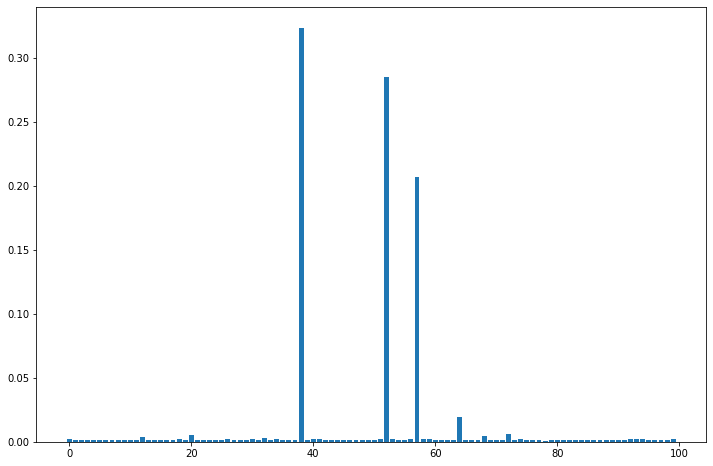

In [57]:
plt.figure(figsize = (12,8))
plt.bar(height = importance_rf, x = np.arange(len(importance_rf)))
plt.show()